Pearson (ratio):  0.7308063392704324
Spearman (ratio):  0.9831920802501751
Pearson (log_ratio):  0.9900661159875807
Spearman (log_ratio):  1.0


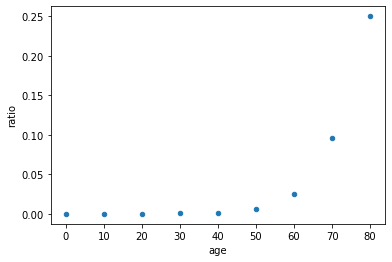

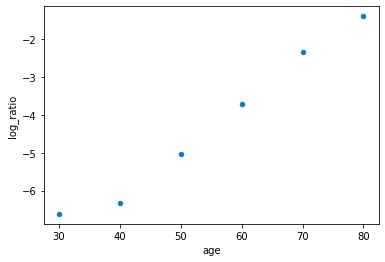

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('./data/TimeAge.csv', index_col='date')
df = df.loc["2020-06-30"] # use the final numbers
df["age"] = df.age.str.replace("s","").astype(int)
df["ratio"] = df.deceased/df.confirmed

df.plot.scatter(x="age",y="ratio")

# look at this correlation!
print("Pearson (ratio): ", df.age.corr(df.ratio, method="pearson"))
print("Spearman (ratio): ", df.age.corr(df.ratio, method="spearman")) # not a perfect 1 because of the tied rankings

df = df[df.age>=30].copy() #exclude 0,10,20s because there are no deaths, can't log that!
df["log_ratio"] = np.log(df.deceased/df.confirmed)
df.plot.scatter(x="age",y="log_ratio")
print("Pearson (log_ratio): ", df.age.corr(df.log_ratio))
print("Spearman (log_ratio): ", df.age.corr(df.log_ratio, method="spearman")) # perfect
